In [1]:
import os

os.environ[
    "OMP_NUM_THREADS"
] = "128"  # for jupyter.nersc.gov otherwise the notebook only uses 2 cores

In [2]:
import numpy as np
import healpy as hp

import pysm3 
import pysm3.units as u
from pysm3 import template

import pysm3.utils as utils

In [3]:
import matplotlib as mpl
mpl.rc('image', cmap='coolwarm')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
forse_Q = hp.read_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_Q_353GHz_3amin_nside4096_uK_CMB.fits')
forse_U = hp.read_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_U_353GHz_3amin_nside4096_uK_CMB.fits')
forse_Q *= 0.07748637 # from uK_CMB to uK_RJ
forse_U *= 0.07748637 

hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_Q_353GHz_3amin_nside4096_uK_RJ.fits', forse_Q)
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_U_353GHz_3amin_nside4096_uK_RJ.fits', forse_U)

setting the output map dtype to [dtype('>f8')]
setting the output map dtype to [dtype('>f8')]


In [7]:
forse_Q = hp.read_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_Q_353GHz_3amin_nside4096_uK_RJ.fits')
forse_U = hp.read_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_U_353GHz_3amin_nside4096_uK_RJ.fits')

almsQ = hp.map2alm(forse_Q, lmax = 4096)
almsU = hp.map2alm(forse_U, lmax = 4096)

bl = hp.gauss_beam(3.0/60/180*np.pi, lmax = 4096)

hp.almxfl(almsQ, 1.0/bl, inplace=True)
hp.almxfl(almsU, 1.0/bl, inplace=True)

hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_Q_353GHz_deconvolved_lmax_4096_nside4096_uK_RJ.fits', hp.alm2map(almsQ, nside=4096))
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_U_353GHz_deconvolved_lmax_4096_nside4096_uK_RJ.fits', hp.alm2map(almsU, nside=4096))

setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


array([1.        , 0.99999986, 0.99999959, ..., 0.31625681, 0.316079  ,
       0.31590125])

In [58]:
dust_dir = "/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/"
d0 = pysm3.ModifiedBlackBody(
    nside = 4096,
    map_I = "pysm_2/dust_t_new.fits",
    map_Q = dust_dir + "forse_dust_Q_353GHz_3amin_nside4096_uK_RJ.fits",
    map_U = dust_dir + "forse_dust_U_353GHz_3amin_nside4096_uK_RJ.fits",
    unit_I = "uK_RJ",
    unit_Q = "uK_RJ",
    unit_U = "uK_RJ",
    map_mbb_index = 1.54,
    map_mbb_temperature = 20,
    unit_mbb_temperature = "K",
    freq_ref_I = "545 GHz",
    freq_ref_P = "353 GHz"
)

In [59]:
map_100GHz_mydust = d0.get_emission(100 * u.GHz)
map_150GHz_mydust = d0.get_emission(150 * u.GHz)

In [62]:
map_100GHz_mydust.shape

(3, 201326592)

https://github.com/galsci/pysm/blob/0730a72b4d6618f30f4615e469866b1c368ae1f7/docs/index.rst#id8

Therefore we recommend to execute all PySM 2 derived models (e.g. d0 to d8) at their native 
 of 512, and then use the output_nside parameter of :py:func:`apply_smoothing_and_coord_transform` to transform to the target resolution, whether higher or lower, in Spherical Harmonics domain.

In [63]:
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_Q_100GHz_3amin_nside512_uK_RJ.fits', pysm3.apply_smoothing_and_coord_transform(map_100GHz_mydust[1], output_nside=512))
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_U_100GHz_3amin_nside512_uK_RJ.fits', pysm3.apply_smoothing_and_coord_transform(map_100GHz_mydust[2], output_nside=512))
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_Q_150GHz_3amin_nside512_uK_RJ.fits', pysm3.apply_smoothing_and_coord_transform(map_150GHz_mydust[1], output_nside=512))
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_U_150GHz_3amin_nside512_uK_RJ.fits', pysm3.apply_smoothing_and_coord_transform(map_150GHz_mydust[2], output_nside=512))

setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]
setting the output map dtype to [dtype('float64')]


In [54]:
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_Q_100GHz_3amin_nside4096_uK_RJ.fits', map_100GHz_mydust[1])
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_U_100GHz_3amin_nside4096_uK_RJ.fits', map_100GHz_mydust[2])
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_Q_150GHz_3amin_nside4096_uK_RJ.fits', map_150GHz_mydust[1])
hp.write_map('/pscratch/sd/j/jianyao/data_lensing/processed_dust_maps/forse_dust_U_150GHz_3amin_nside4096_uK_RJ.fits', map_150GHz_mydust[2])

setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]
setting the output map dtype to [dtype('float32')]


In [55]:
sky = pysm3.Sky(nside=512, preset_strings=["d0"])
map_100GHz = sky.get_emission(100 * u.GHz)
map_150GHz = sky.get_emission(150 * u.GHz)

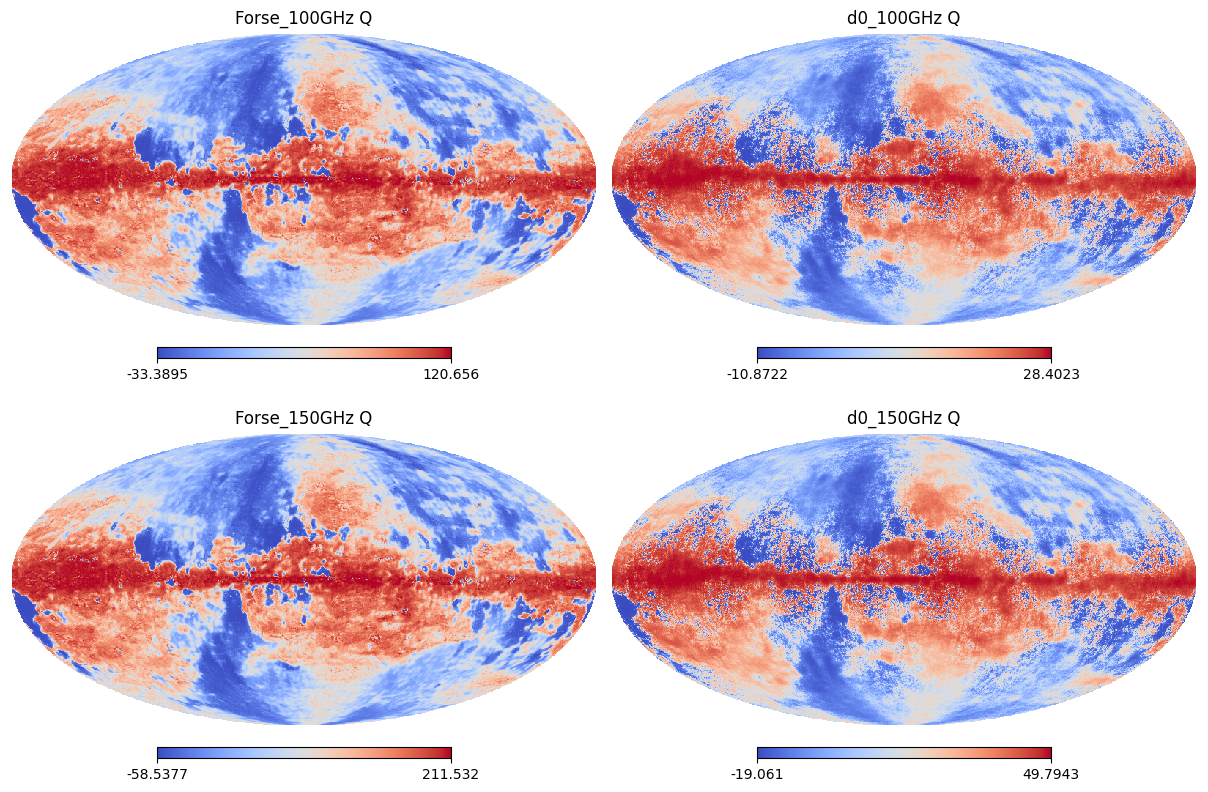

In [56]:
plt.figure(figsize = (12, 8))
hp.mollview(map_100GHz_mydust[1], norm = 'hist', sub = 221, title = 'Forse_100GHz Q')
hp.mollview(map_100GHz[1], norm = 'hist', sub = 222, title = 'd0_100GHz Q')
hp.mollview(map_150GHz_mydust[1], norm = 'hist', sub = 223, title = 'Forse_150GHz Q')
hp.mollview(map_150GHz[1], norm = 'hist', sub = 224, title = 'd0_150GHz Q')

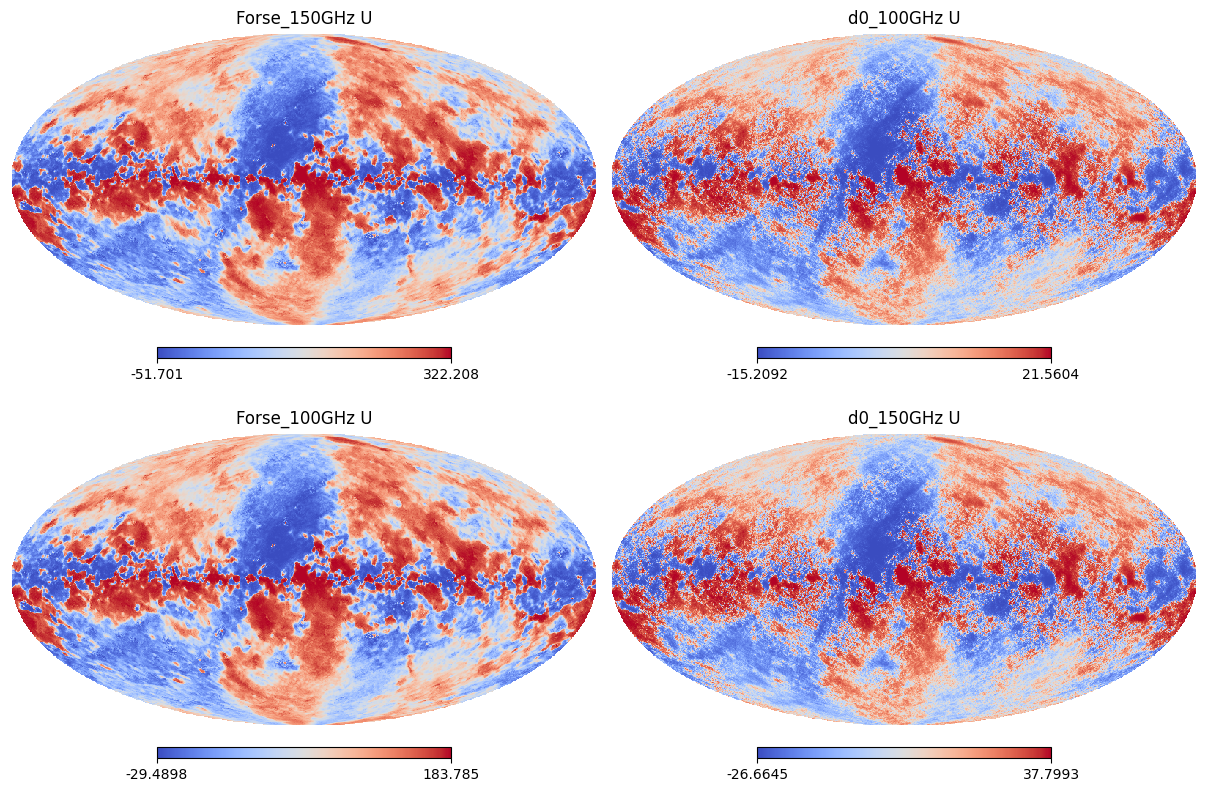

In [57]:
plt.figure(figsize = (12, 8))
hp.mollview(map_150GHz_mydust[2], norm = 'hist', sub = 221, title = 'Forse_150GHz U')
hp.mollview(map_100GHz[2], norm = 'hist', sub = 222, title = 'd0_100GHz U')
hp.mollview(map_100GHz_mydust[2], norm = 'hist', sub = 223, title = 'Forse_100GHz U')
hp.mollview(map_150GHz[2], norm = 'hist', sub = 224, title = 'd0_150GHz U')

In [1]:
def power_law(nu, nu_0, b):

    return (nu / nu_0) ** b

def black_body(nu, nu_0, T):

    return B(nu, T) / B(nu_0, T)

def B(nu, T):
    """Planck function. 

    :param nu: frequency in GHz at which to evaluate planck function.
    :type nu: float.
    :param T: temperature of black body. 
    :type T: float.
    :return: float -- black body brightness.

    """
    x = constants.h * nu * 1.e9 / constants.k / T
    return 2. * constants.h * (nu * 1.e9) ** 3 / constants.c ** 2 / np.expm1(x)